# Name: Pola Gnana Shekar
# Roll No: 21CS10052

- Install ucimlrepo if it is not preinstalled.
- For this uncomment the following command and run it.

In [1]:
# pip install ucimlrepo

In [2]:
#importing the data set

from ucimlrepo import fetch_ucirepo
import pandas as pd
# fetch dataset
spambase = fetch_ucirepo(id=94)
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# Ensure that y is a 1D array
y = y.to_numpy().reshape(-1)

- Scaling the data so that it becomes computationally easier to work on the data, otherwise it will take a lot of time in training the model.

In [3]:
# scaling the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X = scaler.fit_transform(X)

# printing the scaled data
print("X:\n",X)
print("y:\n",y)

X:
 [[-3.42433707e-01  3.30884903e-01  7.12858774e-01 ... -4.52472762e-02
   4.52979198e-02 -8.72413388e-03]
 [ 3.45359395e-01  5.19091945e-02  4.35129540e-01 ... -2.44326749e-03
   2.50562832e-01  1.22832407e+00]
 [-1.45921392e-01 -1.65071912e-01  8.51723390e-01 ...  1.45920848e-01
   2.22110599e+00  3.25873251e+00]
 ...
 [ 6.40127868e-01 -1.65071912e-01  3.83734930e-02 ... -1.19382054e-01
  -2.36941335e-01 -2.72627750e-01]
 [ 2.80176333e+00 -1.65071912e-01 -5.56760578e-01 ... -1.27482666e-01
  -2.42072958e-01 -3.38603654e-01]
 [-3.42433707e-01 -1.65071912e-01  7.32696576e-01 ... -1.24236117e-01
  -2.42072958e-01 -4.01280763e-01]]
y:
 [1 1 1 ... 0 0 0]


In [4]:
# spliting the data set as 80% for training and 20% for testing.

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3680, 57)
Shape of y_train: (3680,)
Shape of X_test: (921, 57)
Shape of y_test: (921,)


## SVM Implementation

In [5]:
# Training the SVM model with the data with linear kernel with out any regularisation.

from sklearn.svm import SVC

# train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [6]:
# making predictions and evalution by calculating accuracy,precision,recall and F1-score
y_pred = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

#calculation of metrics
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

#printing the metrics
print("Test Accuracy:",accuracy)
print("Test Precision:",precision)
print("Test Recall:",recall)
print("Test F1-score:",f1)

Test Accuracy: 0.9250814332247557
Test Precision: 0.9349593495934959
Test Recall: 0.8846153846153846
Test F1-score: 0.909090909090909


Running with regularisation value:  0.001
Running with regularisation value:  0.1
Running with regularisation value:  1
Running with regularisation value:  10
Running with regularisation value:  100
         C  Accuracy
0    0.001  0.890337
1    0.100  0.921824
2    1.000  0.925081
3   10.000  0.922910
4  100.000  0.920738


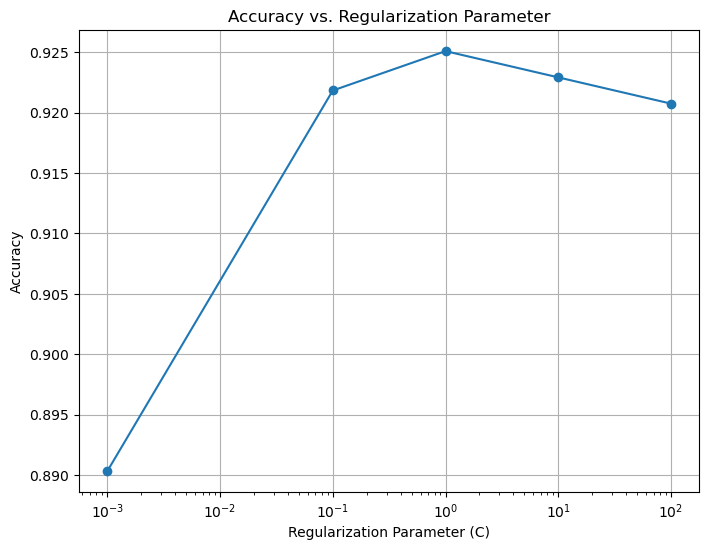

In [7]:
# Applying the regularisation to the model.
import pandas as pd

C_values = [0.001, 0.1, 1, 10, 100]

# empty dataframe to store the results
results = pd.DataFrame(columns=['C', 'Accuracy'])

for C in C_values:
    # Train the models
    print("Running with regularisation value: ", C)
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)

    # Make Predictions
    y_pred = svm_model.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Create a new row to append to the results DataFrame
    new_row = pd.DataFrame({'C': C, 'Accuracy': accuracy}, index=[0])

    # Append the new row to the results DataFrame
    results = pd.concat([results, new_row], ignore_index=True)

# Print the results
print(results)

# plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(results['C'],results['Accuracy'],marker='o')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Accuracy vs. Regularization Parameter')
plt.grid(True)
plt.show()

## Kernel Tricks

Linear Metrics:
Accuracy: 0.9250814332247557
Precision: 0.9349593495934959
Recall: 0.8846153846153846
F1-score: 0.909090909090909

Poly (degree 2) Metrics:
Accuracy: 0.8393051031487514
Precision: 0.9514925373134329
Recall: 0.6538461538461539
F1-score: 0.7750759878419453

Poly (degree 3) Metrics:
Accuracy: 0.7643865363735071
Precision: 0.9435897435897436
Recall: 0.4717948717948718
F1-score: 0.629059829059829

Sigmoid Metrics:
Accuracy: 0.8892508143322475
Precision: 0.8850267379679144
Recall: 0.8487179487179487
F1-score: 0.8664921465968587

RBF Metrics:
Accuracy: 0.9348534201954397
Precision: 0.9508196721311475
Recall: 0.8923076923076924
F1-score: 0.9206349206349206



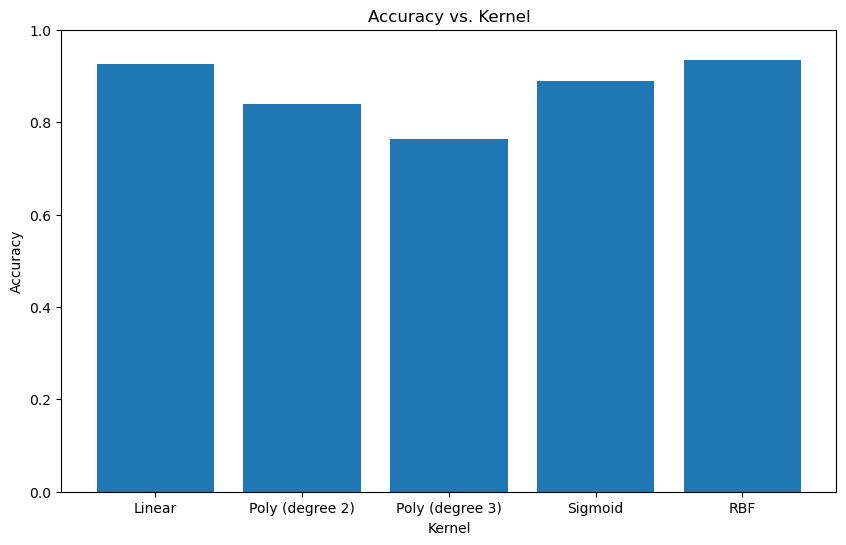

In [8]:
# List of kernel types to try
kernels = ['linear', 'poly', 'poly', 'sigmoid', 'rbf']
degrees = [None, 2, 3, None, None]  # For polynomial kernels of degree 2 and 3
kernel_labels = ['Linear', 'Poly (degree 2)', 'Poly (degree 3)', 'Sigmoid', 'RBF']

# Create empty lists to store results
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Train and evaluate SVM models with different kernels
for i, kernel_type in enumerate(kernels):
    if kernel_type == 'poly':
        degree = degrees[i]
        kernel_label = f'Poly (degree {degree})'
        svm_model = SVC(kernel='poly', degree=degree)
    else:
        kernel_label = kernel_labels[i]
        svm_model = SVC(kernel=kernel_type)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Print the metrics for the current kernel
    print(f'{kernel_label} Metrics:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print()

# Plot the accuracy for different kernels
plt.figure(figsize=(10, 6))
plt.bar(kernel_labels, accuracy_list)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Kernel')
plt.ylim([0, 1])  # Set the y-axis range to [0, 1]
plt.show()

## Overfitting and Underfitting 

In [9]:
import pandas as pd

# List of experiments with polynomial degree and regularization parameter 'C'
experiments = [
    {'degree': 1, 'C': 0.01},
    {'degree': 1, 'C': 100},
    {'degree': 3, 'C': 0.01},
    {'degree': 3, 'C': 100},
]

# Create empty DataFrames to store results
results_train = pd.DataFrame(columns=['Experiment', 'Degree', 'C', 'Train Accuracy'])
results_test = pd.DataFrame(columns=['Experiment', 'Degree', 'C', 'Test Accuracy'])

# Lists to store train and test accuracy values
train_accuracies = []
test_accuracies = []

# Train SVM models for different experiments and degrees of polynomial kernel
for i, experiment in enumerate(experiments):
    degree = experiment['degree']
    C = experiment['C']
    experiment_name = f'Experiment {i + 1}'

    # Train SVM model
    svm_model = SVC(kernel='poly', degree=degree, C=C)
    svm_model.fit(X_train, y_train)

    # Calculate train accuracy
    y_train_pred = svm_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate test accuracy
    y_test_pred = svm_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append results to DataFrames using pd.concat()
    results_train = pd.concat([results_train, pd.DataFrame({'Experiment': experiment_name,'Degree': degree, 'C': C, 'Train Accuracy': train_accuracy}, index=[0])], ignore_index=True)
    results_test = pd.concat([results_test, pd.DataFrame({'Experiment': experiment_name, 'Degree': degree, 'C': C,'Test Accuracy': test_accuracy}, index=[0])], ignore_index=True)

    # Append accuracy values to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Print train and test accuracies
print("Train Accuracies:")
print(results_train)

print("\nTest Accuracies:")
print(results_test)

Train Accuracies:
     Experiment Degree       C  Train Accuracy
0  Experiment 1      1    0.01        0.811685
1  Experiment 2      1  100.00        0.931793
2  Experiment 3      3    0.01        0.641848
3  Experiment 4      3  100.00        0.962228

Test Accuracies:
     Experiment Degree       C  Test Accuracy
0  Experiment 1      1    0.01       0.795874
1  Experiment 2      1  100.00       0.927253
2  Experiment 3      3    0.01       0.611292
3  Experiment 4      3  100.00       0.923996


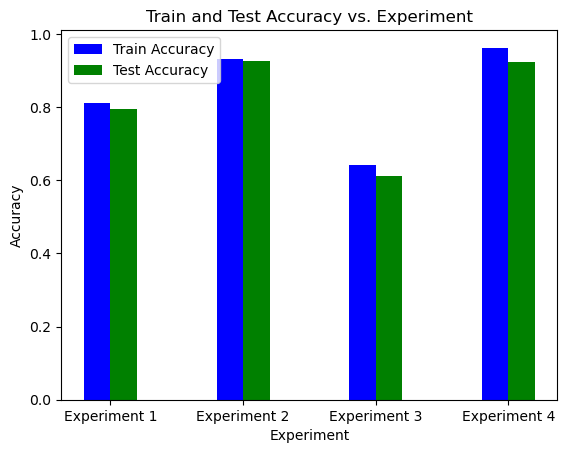

In [10]:
import numpy as np

# Plot train and test accuracies side by side
width = 0.20
x = np.arange(len(experiments))
fig, ax = plt.subplots()
train_bars = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='b')
test_bars = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='g')
ax.set_xlabel('Experiment')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracy vs. Experiment')
ax.set_xticks(x)
ax.set_xticklabels([f'Experiment {i+1}' for i in range(len(experiments))])
ax.legend()

# Show the plot
plt.show()

### Summary of overfitting and underfitting analysis:
- Experiment 1 with a simple linear kernel and a small regularization parameter, the model doesn't overfit or underfit. Both train and test accuracies are moderate, indicating a reasonably good model fit.
- Experiment 2 demonstrates that a good balance can be achieved with a simple linear kernel and moderate regularization, resulting in high accuracy without overfitting.
- Experiment 3 shows the impact of underfitting when the model is too simplistic and the regularization is low.
- Experiment 4 demonstrates that a higher degree polynomial kernel can capture more complex patterns with strong regularization, leading to good performance without overfitting.